# 主題：政治新聞資料分析
- 陳熙

#  資料清洗及分析

In [1]:
import os
import pickle
import jieba
import operator
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from datetime import datetime
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from modules import *

font_path = '../tools/msjh.ttc'
font = font_manager.FontProperties(fname='../tools/msjh.ttc',
                                   weight='bold',
                                   style='normal', size=16)

In [2]:
with open('../crawler/data/new_talk.pkl', 'rb') as f:
    data = pickle.load(f)
data = data[::-1]#按時間順序存放data
contents = [news['content'] for news in data]#取出data中的content

In [3]:
jieba.set_dictionary('../jieba_data/dict.txt.big')
jieba.load_userdict('../jieba_data/userdict.txt')
stopwords = []
with open('../jieba_data/stopwords.txt', 'r', encoding='UTF-8') as file:#得到stopwords
    for each in file.readlines():
        stopwords.append(each.strip())
    stopwords.append(' ')

Building prefix dict from C:\Users\Nick\Political-News-Analysis-Nick\jieba_data\dict.txt.big ...
Loading model from cache C:\Users\Nick\AppData\Local\Temp\jieba.u3c9d576fbde6e603062f9fcc233a4e00.cache
Loading model cost 1.353 seconds.
Prefix dict has been built succesfully.


In [4]:
# add cutted dict to each news
for i in range(len(data)):
    current_content = data[i]['content']
    current_cutted = jieba.lcut(remove_punctuation(current_content))#去除標點 英文 數字 并斷句存爲dict
    data[i]['cutted_dict'] = remove_stopwords_from_dict(lcut_to_dict(current_cutted),stopwords)#去除stopwords

In [5]:
get_coshow(contents[:1000])[:10]#沒有處理的content中show最常出現的兩個詞

[('今日', 428),
 ('月日', 351),
 ('他的', 255),
 ('為了', 252),
 ('都是', 250),
 ('年月', 225),
 ('也是', 216),
 ('台灣的', 203),
 ('的人', 199),
 ('的是', 187)]

In [6]:
cutted_dict = get_cutted_dict(contents[:1000])#沒有處理的content中show最常出現的兩個詞
high_freq_pair = first_n_words(cutted_dict, 20)
high_freq_pair

[('台灣', 1380),
 ('國民黨', 783),
 ('侯友宜', 716),
 ('柯文哲', 691),
 ('民進黨', 681),
 ('指出', 600),
 ('中國', 561),
 ('媒體', 541),
 ('選舉', 521),
 ('市府', 501),
 ('希望', 494),
 ('公司', 487),
 ('一個', 469),
 ('美國', 464),
 ('政府', 448),
 ('未來', 413),
 ('提供', 412),
 ('蘇貞昌', 388),
 ('針對', 349),
 ('國家', 337)]

In [7]:
cutted_dict = get_cutted_dict(contents)

In [8]:
# 可能人名
possible_name = first_n_words(cutted_dict, 1000, 3, 3)#3個字的詞
possible_name[:10]

[('民進黨', 8922),
 ('國民黨', 8420),
 ('柯文哲', 8153),
 ('韓國瑜', 6590),
 ('陳其邁', 4683),
 ('蔡英文', 3738),
 ('蘇貞昌', 3280),
 ('姚文智', 2973),
 ('候選人', 2943),
 ('侯友宜', 2665)]

In [9]:
# 可能事件
possible_events = first_n_words(cutted_dict, 200, 4)#大於等於4個字的詞
possible_events[:10]

[('台北市長柯文哲', 1590),
 ('總統蔡英文', 1356),
 ('時代力量', 1135),
 ('九二共識', 1022),
 ('行政院長賴清德', 1003),
 ('中華民國', 852),
 ('競選總部', 779),
 ('蔡英文總統', 762),
 ('競選辦公室', 720),
 ('兩岸關係', 708)]

In [10]:
names = []
with open('../data/names.txt', 'r', encoding='utf-8-sig') as f: #讀names.txt
    names = f.read().split('\n')
    
events = []
with open('../data/events.txt', 'r', encoding='utf-8-sig') as f: #讀events.txt
    events = f.read().split('\n')

### 文字雲

In [11]:
clean_contents = []
for content in contents:
    for word in stopwords:
        content.replace(word,' ')
    clean_contents.append(remove_punctuation(content))#將内容中數字 英文 標點去掉

47054


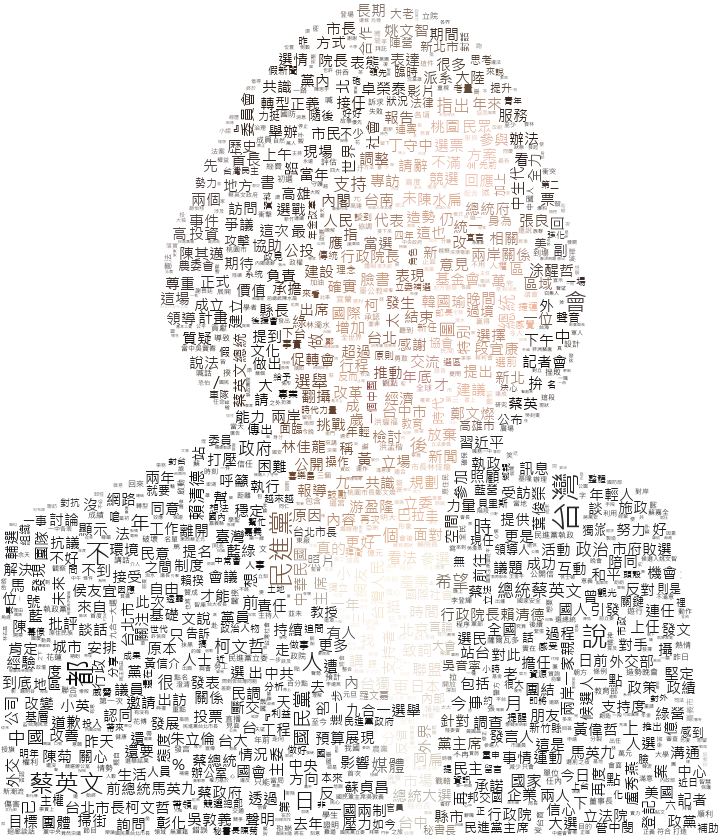

In [18]:
# 蔡英文
ten_wc = get_wordcloud_of_keywords('蔡英文', clean_contents, '../politicians/ten.png')
# ten_wc.to_file('politicians/tenwc.png')
ten_wc.to_image()

42948


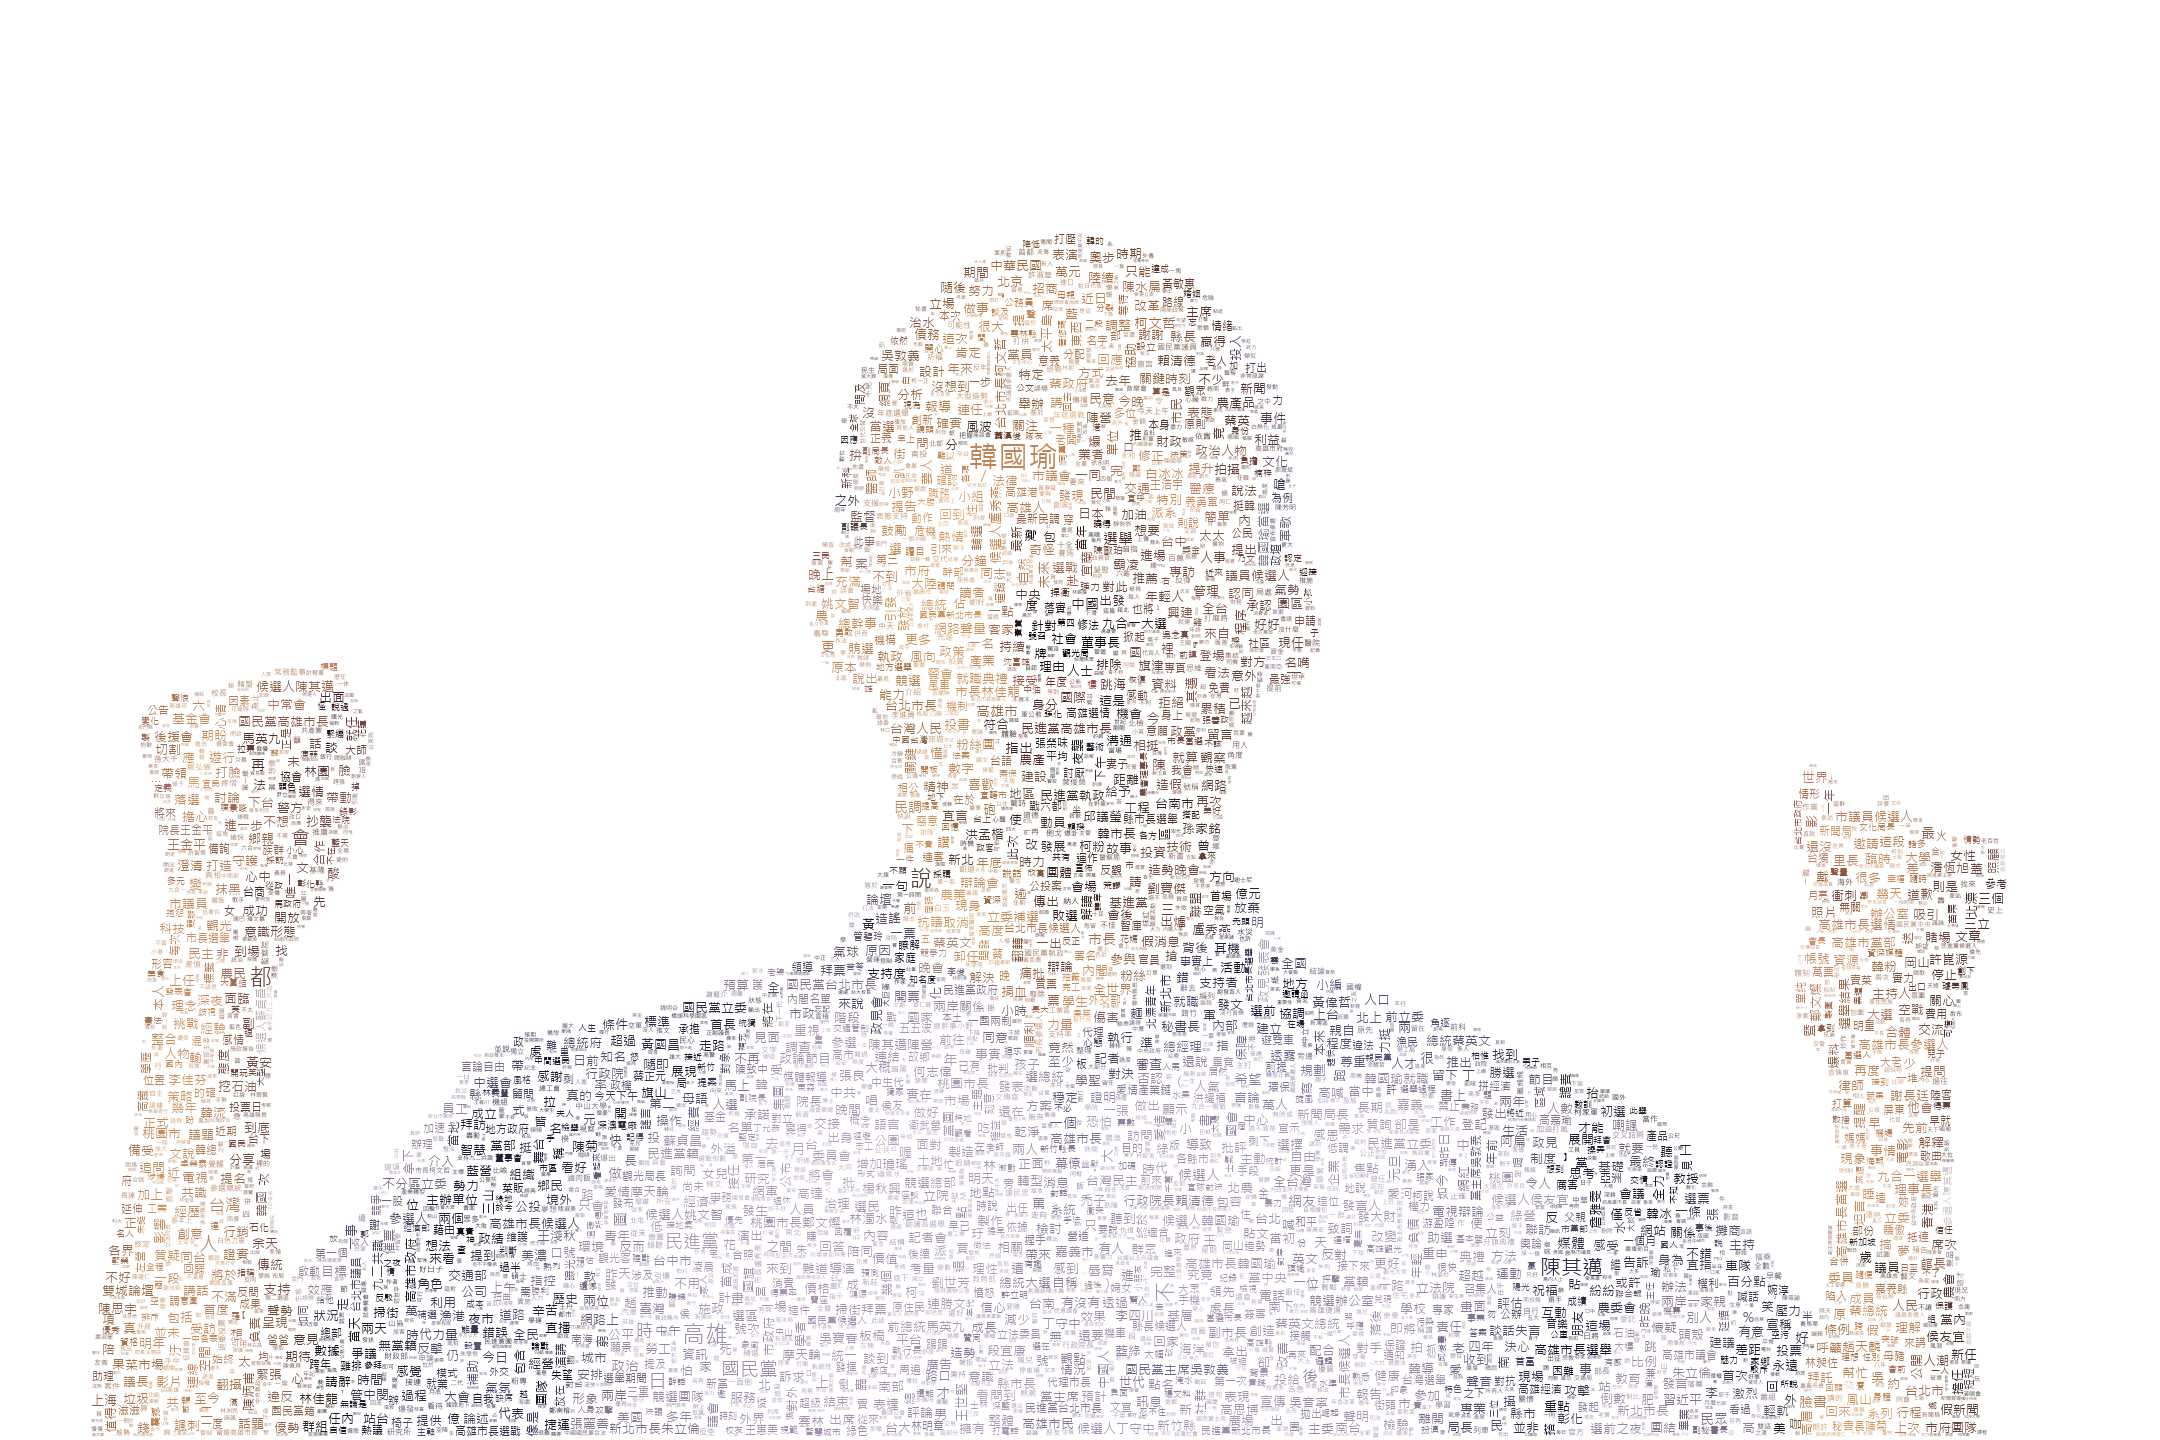

In [22]:
# 韓國瑜
han_wc = get_wordcloud_of_keywords('韓國瑜', clean_contents, '../politicians/han.png')
han_wc.to_image()